- **Aluno:** Giovanni Martins de Sá Júnior<br>
- **Disciplina:** Introdução à Inteligência Computacional<br>
- **Professor:** Cristiano Leite de Castro

# Objetivos:

## Regressão Linear

1. Ler o Capítulo 3 do Livro An Introduction to Statistical Learning - Python Edition, incluindo a Seção 3.6. - Lab: Linear Regression.
2. Resolver os exercícios 9, 13 e 15 da Seção 3.7 - Exercises.
3. Entregar um relatório PDF no formato python notebook contendo as soluções dos exercícios 9, 13 e 15.

## Classificação

1. Ler o Capítulo 4 do Livro An Introduction to Statistical Learning - Python Edition, incluindo a Seção 4.7 - Lab: Logistic Regression, LDA, QDA, and KNN.
2. Resolver os exercícios 7 e 14 da Seção 4.8 - Exercises.
3. Entregar um relatório PDF no formato python notebook contendo as soluções dos exercícios 7 e 14.

# Regressão Linear

## (Exercício 9): Regressão Linear múltipla com o dataset *Auto*.

**a.** Produza uma matriz de dispersão que inclua todas as variáveis do conjunto de dados.

In [1]:
# Importação de Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do dataset
auto = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values='?').dropna()

# Visualização inicial do dataset
print(auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet

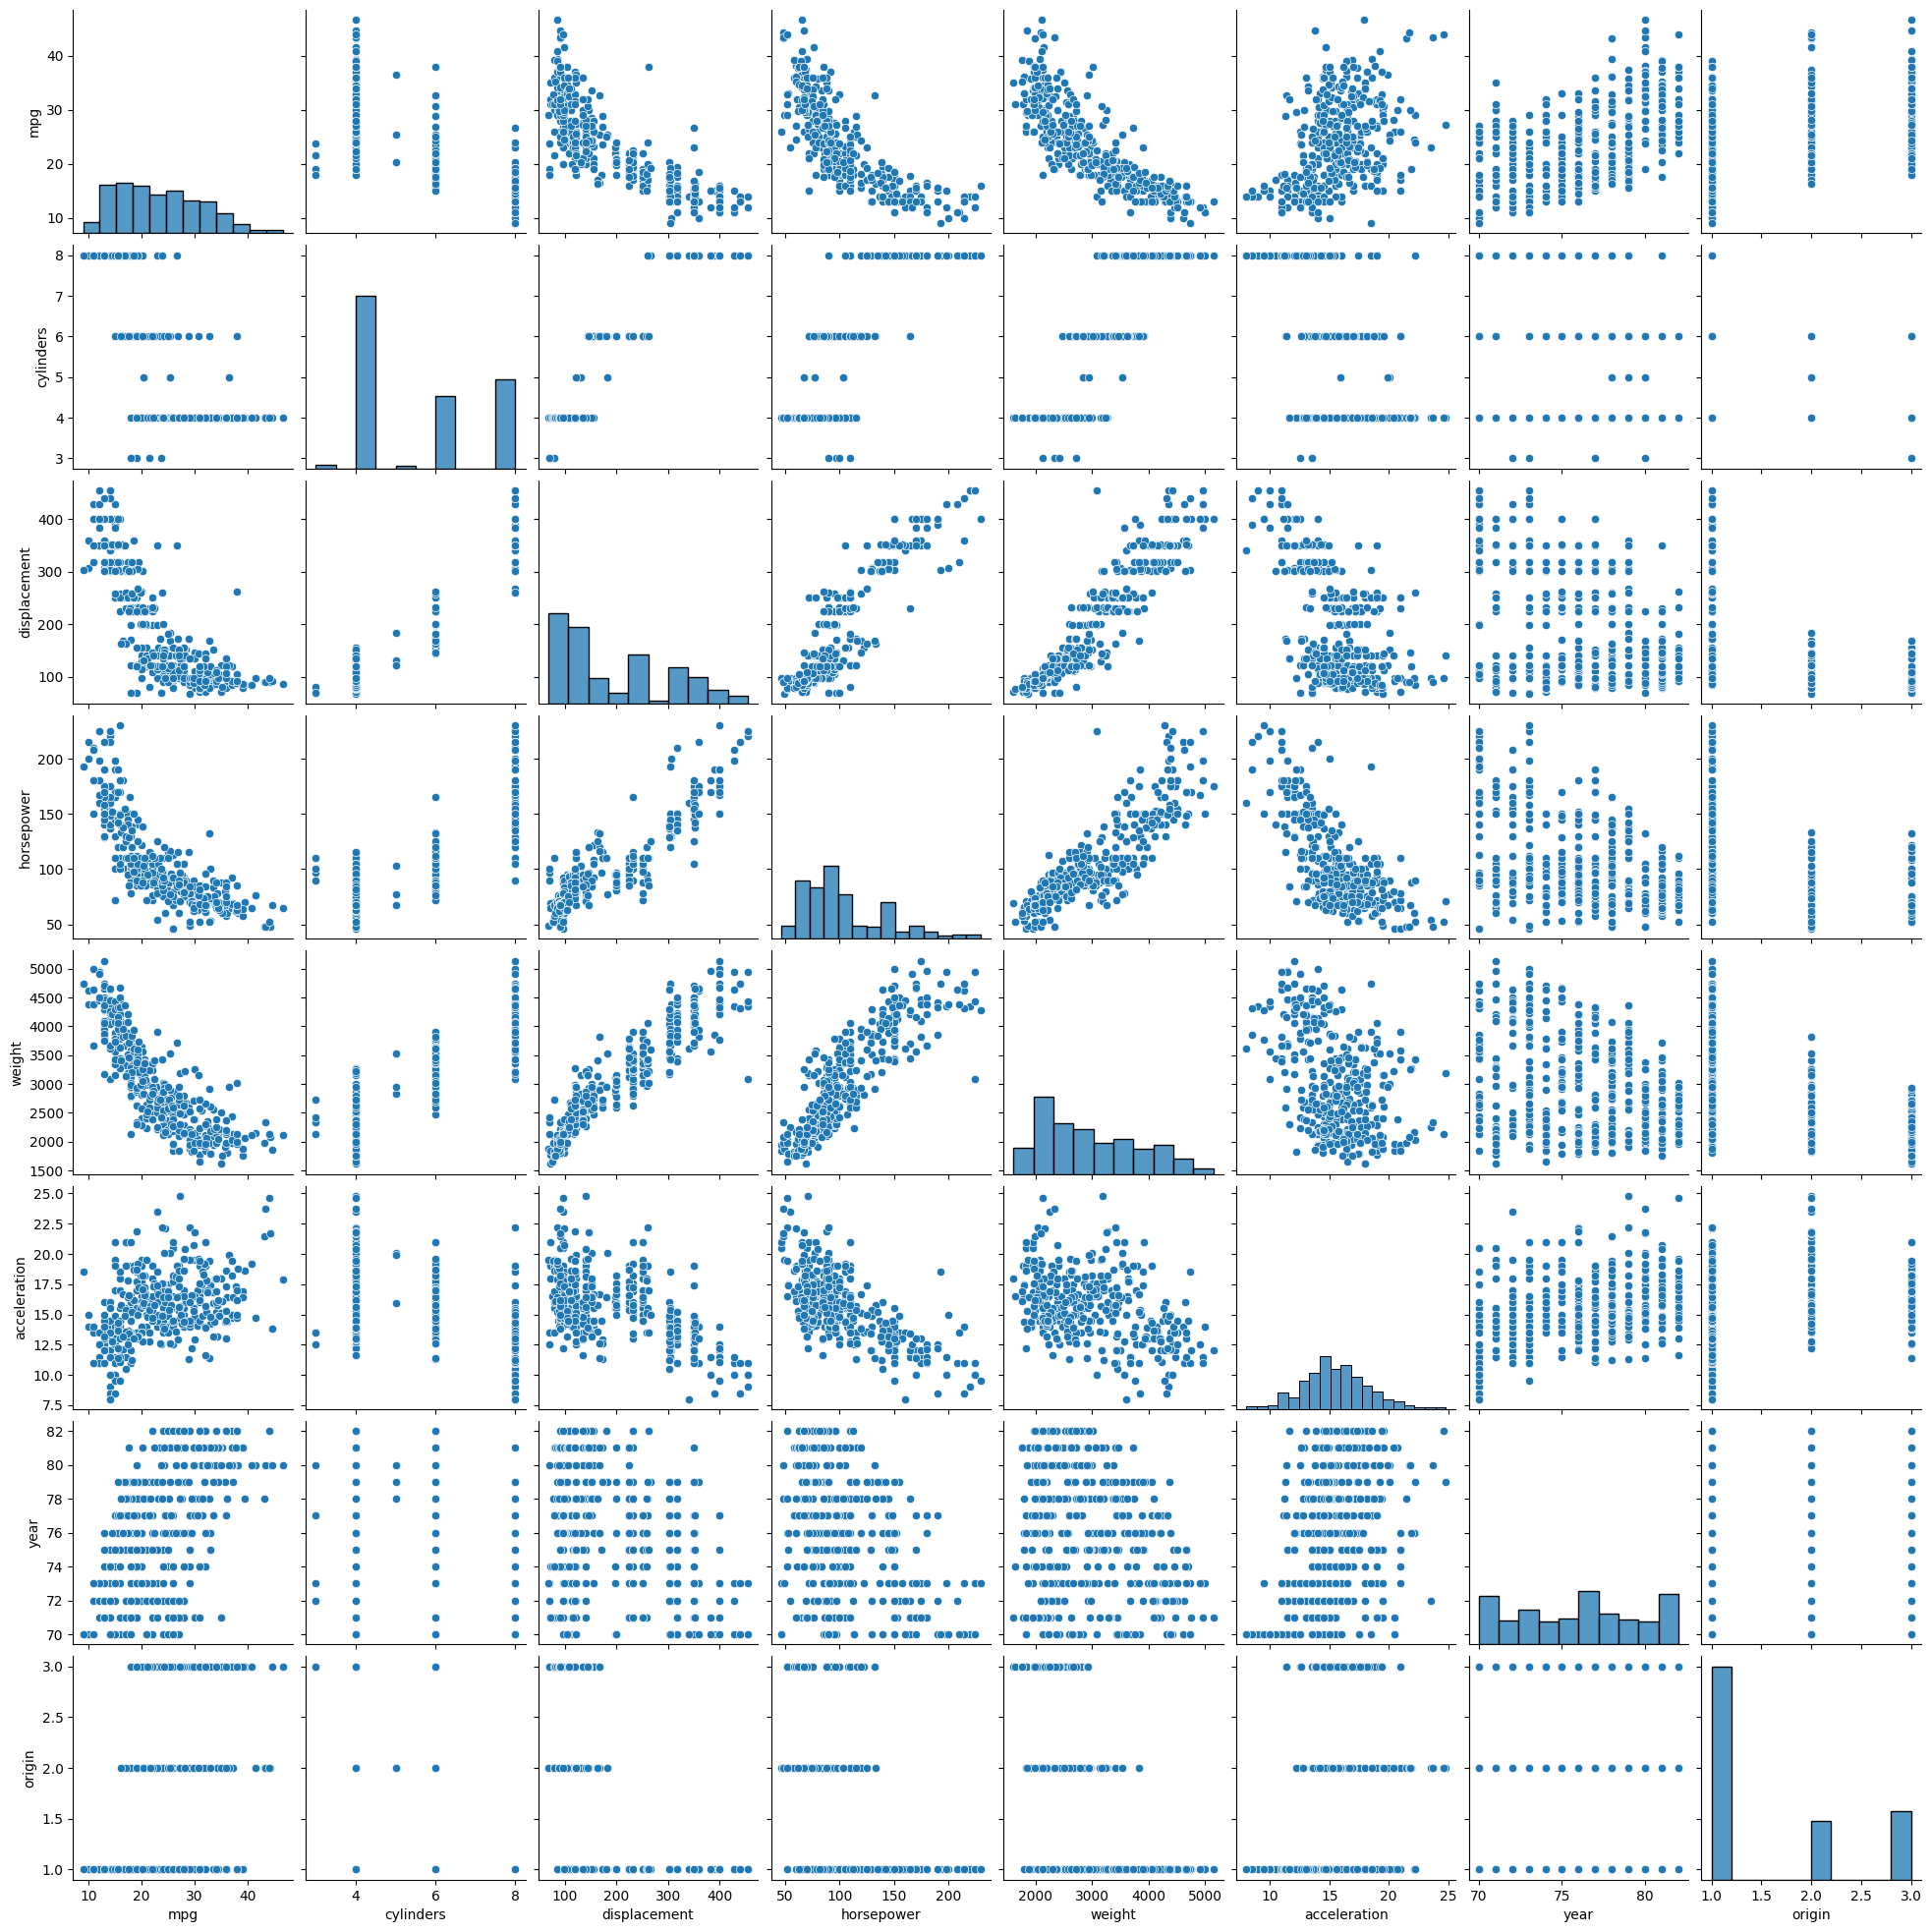

In [2]:
# Converter colunas númericas
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto.dropna(inplace=True)

# Matriz de dispersão
sns.pairplot(auto)

**b.** Calcule a matriz de correlações entre as variáveis usando o método `DataFrame.corr()`.

In [3]:
# Matriz de correlação usando o método DataFrame.corr()
corr_matrix = auto.drop(columns=['name']).corr()

# Exibição numérica
print(corr_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

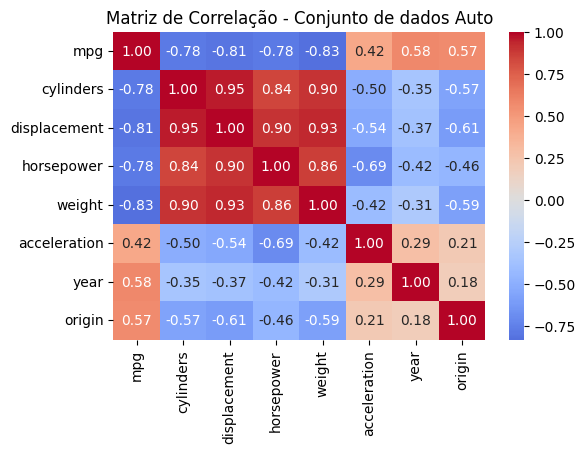

In [7]:
# Desenho do heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de Correlação - Conjunto de dados Auto")
plt.show()

**c.** Use a função `sm.OLS()` (de `statsmodels`) para realizar uma regressão linear múltipla, tendo `mpg` (milhas por galão) como variável resposta, e todas as outras variáveis - exceto `name` - como preditores.
> Para a resolução desta etapa, foi utilizado uma função alternativa `smf.ols()` no lugar de `sm.OLS()`. O motivo se deve à visualização dos dados no subitem seguinte, em que se utiliza a função anova_lm.

In [29]:
import statsmodels
print(statsmodels.__version__)

0.14.5


In [32]:
import seaborn as sns
sns._has_statsmodels

AttributeError: module 'seaborn' has no attribute '_has_statsmodels'

In [25]:
# Importação de bibliotecas
import statsmodels
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Modelo via fórmula — 'mpg' como resposta e todas as outras (menos 'name') como preditoras
model = smf.ols(
    formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
    data=auto
).fit()

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        19:03:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [27]:
anova_results = anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


1. Existe relação entre os preditores e a resposta? (Use `anova_lm()` para responder).
> Sim

2. Quais os preditores parecem ter relação estatisticamente significativa com a resposta?
 > Teste

3. O que o coeficiente da variável `year` sugere?
 > Teste

**d.** Produza alguns gráficos de diagnóstico da regressão linear. Comente se há algum problema com o ajuste.
* Os resíduos mostram outliers grandes?
* O gráfico de leverage identifica observações com alta alavancagem?

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

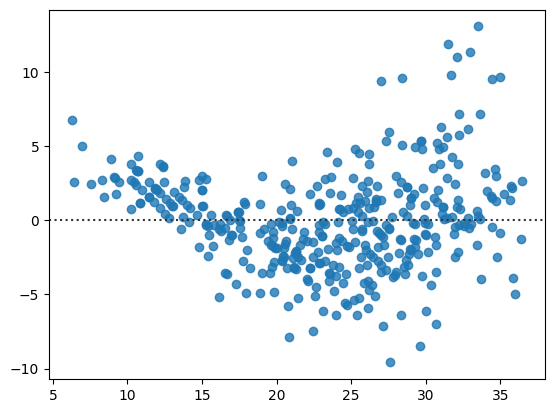

In [34]:
# Gráfico de resíduos
import statsmodels.api as sm

sns.residplot(
    x=model.fittedvalues,
    y=model.resid,
    lowess=True,
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs Valores Ajustados")
plt.show()

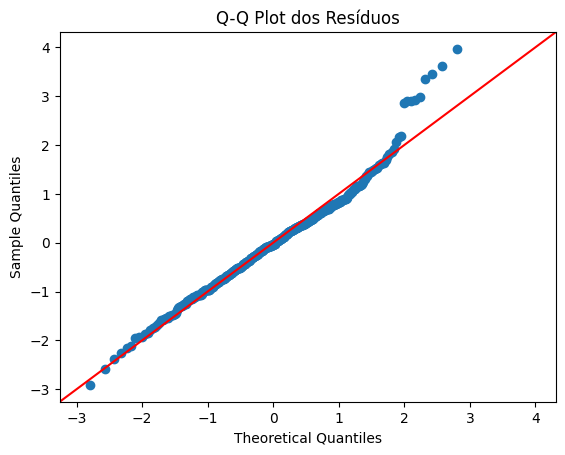

In [23]:
# Q-Q Plot para normalidade dos resíduos
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Q-Q Plot dos Resíduos")
plt.show()

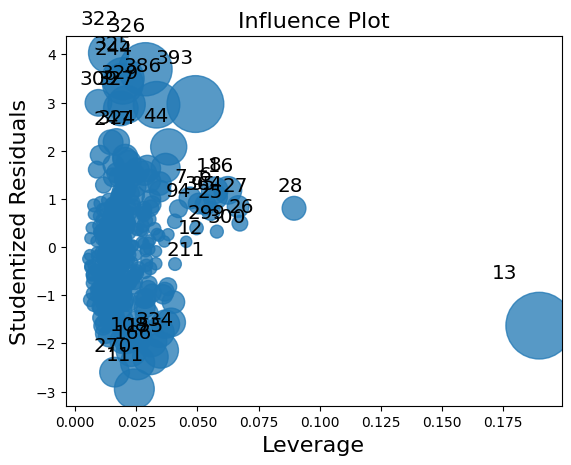

In [24]:
# Leverage plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

**e.** Ajuste alguns modelos com interações (como `X1*X2`). Há interações estatisticamente significativas?

In [35]:
# Exemplo: interação entre horsepower e weight
auto['hp_weight'] = auto['horsepower'] * auto['weight']
X_int = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'hp_weight']]
X_int = sm.add_constant(X_int)
y = auto['mpg']

model_int = sm.OLS(y, X_int).fit()
print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          1.88e-159
Time:                        19:09:58   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8757      4.511      0.638   

**f.** Tente algumas transformações nas variáveis (como `log(x)`, `√X`, `X²`). Comente o que você observa.

In [37]:
import numpy as np

auto['log_weight'] = np.log(auto['weight'])
auto['sqrt_horsepower'] = np.sqrt(auto['horsepower'])
auto['year_sq'] = auto['year'] ** 2

X_trans = auto[['cylinders', 'displacement', 'sqrt_horsepower', 'log_weight', 'acceleration', 'year_sq', 'origin']]
X_trans = sm.add_constant(X_trans)
y = auto['mpg']

model_trans = sm.OLS(y, X_trans).fit()
print(model_trans.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     309.5
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          1.40e-153
Time:                        19:20:45   Log-Likelihood:                -990.10
No. Observations:                 392   AIC:                             1996.
Df Residuals:                     384   BIC:                             2028.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             155.7976     11.460     

## (Exercício 13): Regressão Linear múltipla com dados gerados sinteticamente

**a. Usando o método `normal()` do seu gerador de números aleatórios, crie um vetor `x` contendo 100 observações extraídas de uma distribuição `N(0,1)`. Isso representa uma característica `X`.**

Cria-se um vetor x de 100 posições, com valores aleatórios com média 0 e desvio padrão 1. Assim, ele será o nosso preditor na regressão.

In [39]:
# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
np.random.seed(1)

# Criando x ~ N(0,1)
x = np.random.normal(0, 1, 100)
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

**b. Usando o método `normal()`, crie um vetor eps contendo 100 observações de uma distribuição `N(0,0.25)` — uma distribuição normal com média zero e variância 0.25.**

O `eps` representará o termo de erro do modelo linear, com variância menor que 1, introduzindo ruído controlado na variável resposta.

In [43]:
# Criando epsilon ~ N(0, 0.25)
eps = np.random.normal(0, np.sqrt(0.25), 100)
eps

array([-0.22356428,  0.61225385,  0.20174582,  0.29678926, -0.54745592,
        0.08469122,  0.37027823, -0.4768503 , -0.13310925,  0.01630727,
       -0.68655866,  0.1575797 ,  0.42308032, -0.42975797,  0.17527299,
       -0.65614171, -0.01934775, -0.80788618,  0.56070885,  0.20445027,
       -0.01230848, -0.38758081,  0.63687797,  0.98355087, -0.92899093,
        0.61808202,  0.81382538,  0.16900585, -0.59963402,  0.43167266,
       -0.09046015, -0.30196031, -0.61502907,  0.27526875,  0.39640343,
       -0.31176536,  0.26028817, -0.57217069,  0.40093052,  0.02328365,
       -0.09328489, -0.05087294,  0.43444308,  0.37520582,  0.26473266,
        0.0688506 ,  0.03891056,  0.30919013,  0.11624728,  0.3412757 ,
       -0.15505839, -1.21741888,  0.5194123 ,  1.09348982,  0.22068222,
       -0.05007762, -0.06822237, -0.05952709,  0.0087047 , -0.56100936,
       -0.25854723, -0.49851341,  0.12439958, -0.14832058,  0.24760566,
       -0.08735158,  0.49316759,  0.10676695,  1.09534986, -0.94

**c. Usando `x` `eps`, gere um vetor `y` de acordo com o modelo:** <br>

$$
Y = -1 + 0.5X + ϵ
$$
**Qual é o comprimento do vetor y? Quais são os valores de `β₀` e `β₁` nesse modelo linear?**

O comprimento de `y` terá tamanho **100**, tal como `x` e `eps`. Assim, o modelo linear terá os coeficientes `β₀`=**-1** e `β₁`=**0.5**, que serão utilizados como referência. 

In [45]:
# Criando o modelo
y = -1 + 0.5*x + eps

# Comprimento de y
len_y = len(y)

# Valores reais dos coeficientes
beta_0 = -1
beta_1 = 0.5

print(f"Comprimento de y: {len_y}")
print(f"β0 ={beta_0}, β1 ={beta_1}")

Comprimento de y: 100
β0 =-1, β1 =0.5


**d. Crie um gráfico de dispersão exibindo a relação entre x e y. Comente sobre o que você observa.**

Conforme se observa, o gráfico apresenta um tendência linear positiva (β₁ > 0), mas os pontos estão dispersos devido ao ruído de `eps`. A relação é visivelmente linear, porém não é perfeita.

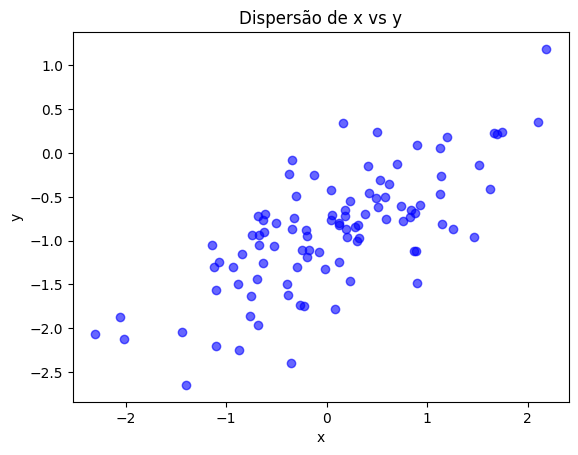

In [46]:
# Gráfico de dispersão
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispersão de x vs y')
plt.show()

**e. Ajuste um modelo de regressão linear por mínimos quadrados para prever y usando x. Comente sobre o modelo obtido. Como `β̂₀` e `β̂₁` se comparam a `β₀` e `β₁`?**

Os coeficientes estimados  `β̂₀` e `β̂₁` devem estar próximos dos valores reais definidos (-1, e 0.5), respectivamente). Deste modo, as diferenças surgem devido ao ruído aleatório e ao tomanho amostral pequeno

In [50]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           2.20e-17
Time:                        20:47:32   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

**f. Exiba a linha de regressão obtida no gráfico de dispersão do item (d). Desenhe a linha de regressão populacional no gráfico, em cor diferente. Use `legend()` para criar legenda apropriada.**

A linha vermelha (estimada) está próxima da linha verde, mostrando que o modelo OLS captura bem a tendência linear apesar do ruído.

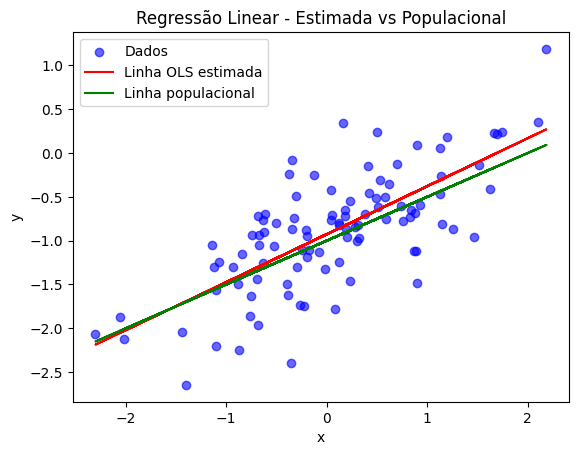

In [52]:
plt.scatter(x, y, color='blue', alpha=0.6, label='Dados')
plt.plot(x, model.predict(X), color='red', label='Linha OLS estimada')
plt.plot(x, -1 + 0.5*x, color='green', label='Linha populacional')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear - Estimada vs Populacional')
plt.legend()
plt.show()

**g. Ajuste agora um modelo de regressão polinomial que prevê y usando x e x². Há evidência de que o termo quadrático melhora o ajuste do modelo? Explique.**

O coeficiente de x² normalmente não será significativo (p-valor alto) porque os dados foram gerados linearmente. Assim, não há evidência de melhora com o termo quadrático

In [53]:
# Criando termo quadrático
X_poly = sm.add_constant(np.column_stack((x, x**2)))

# Ajustando o modelo polinomial
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           2.83e-16
Time:                        21:03:18   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

**h. Repita (a)–(f) diminuindo o ruído nos dados (variância menor de eps). Descreva os resultados.**

Menos dispersão em torno da linha, coeficientes estimados mais próximos dos reais. Intervalos de confiança menores.

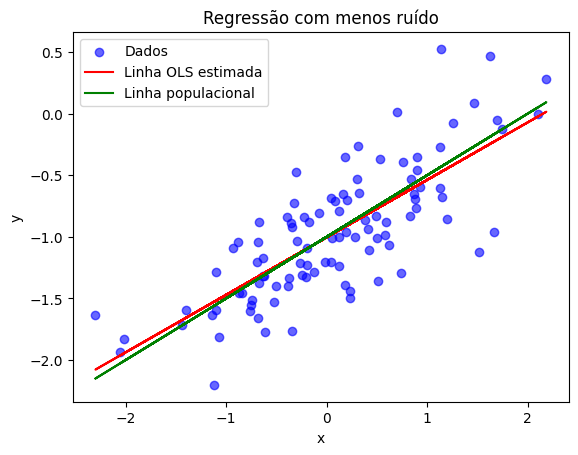

In [58]:
# Menos ruído: variância em 0.1
eps_low_noise = np.random.normal(0, np.sqrt(0.1), 100)
y_low_noise = -1 + 0.5*x + eps_low_noise

# Ajustando o modelo
X = sm.add_constant(x)
model_low_noise = sm.OLS(y_low_noise, X).fit()

# Gráfico
plt.scatter(x, y_low_noise, color='blue', alpha=0.6, label='Dados')
plt.plot(x, model_low_noise.predict(X), color='red', label='Linha OLS estimada')
plt.plot(x, -1 + 0.5*x, color='green', label='Linha populacional')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão com menos ruído')
plt.legend()
plt.show()

In [57]:
print(model_low_noise.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           5.83e-24
Time:                        21:13:09   Log-Likelihood:                -27.192
No. Observations:                 100   AIC:                             58.38
Df Residuals:                      98   BIC:                             63.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9961      0.032    -30.978      0.0

**i. Repita (a)–(f) aumentando o ruído nos dados (variância maior de eps). Descreva os resultados.**

Maior dispersão, linha estimada ainda captura a tendência, mas coeficientes menos precisos. Intervalos de confiança maiores.

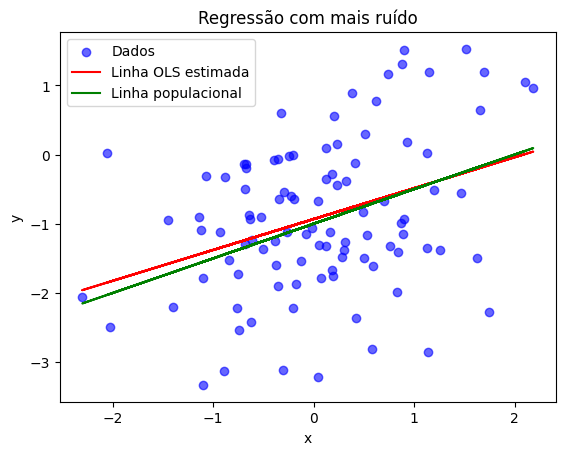

In [59]:
# Mais ruído: variância em 1
eps_high_noise = np.random.normal(0, np.sqrt(1), 100)
y_high_noise = -1 + 0.5*x + eps_high_noise

# Ajuste do modelo
model_high_noise = sm.OLS(y_high_noise, X).fit()

# Gráfico
plt.scatter(x, y_high_noise, color='blue', alpha=0.6, label='Dados')
plt.plot(x, model_high_noise.predict(X), color='red', label='Linha OLS estimada')
plt.plot(x, -1 + 0.5*x, color='green', label='Linha populacional')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão com mais ruído')
plt.legend()
plt.show()

In [60]:
print(model_high_noise.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     14.27
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           0.000272
Time:                        21:21:34   Log-Likelihood:                -145.28
No. Observations:                 100   AIC:                             294.6
Df Residuals:                      98   BIC:                             299.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9324      0.105     -8.902      0.0

**j. Quais são os intervalos de confiança para β₀ e β₁ com os conjuntos de dados original, menos ruidoso e mais ruidoso? Comente os resultados.**

Quanto menor o ruído, mais estreitos são os intervalos de confiança. Quanto maior o ruído, mais os intervalos. Deste modo, isso reflete a incerteza na estimativa dos coeficientes devido ao ruído aleatório.

In [62]:
print("Intervalos de confiança - dados originais")
print(model.conf_int())
print("\nIntervalos de confiança - menos ruído")
print(model_low_noise.conf_int())
print("\nIntervalos de confiança - mais ruído")
print(model_high_noise.conf_int())

Intervalos de confiança - dados originais
[[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]

Intervalos de confiança - menos ruído
[[-1.07178601 -0.93704416]
 [ 0.39065537  0.54252389]]

Intervalos de confiança - mais ruído
[[-1.14023074 -0.72452511]
 [ 0.21167497  0.68021979]]


## (Exercício 15): Predição de crimes com dataset Boston

**a. Para cada preditor, ajuste um modelo de regressão linear simples para prever a resposta. Descreva seus resultados. Em quais modelos há uma associação estatisticamente significativa entre o preditor e a resposta? Crie alguns gráficos para apoiar suas afirmações.**

- Os preditores com p-valor < 0.05 mostram uma associação significativa com `CRIM`.
- É esperado que variáveis como `ZN` (proporção de terrenos residenciais), `NOX` (concentração de óxidos de nitrogênio, `RM` (número médio de quartos) sejam estatisticamente significativas.
- Os gráficos ajudam a visualizar a direção (positiva / negativa) da associação. 

In [66]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Organizar os dados
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]  # CRIM como alvo

# Nomes das colunas (mesmos usados tradicionalmente)
columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX",
    "PTRATIO","B","LSTAT"
]

X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name='CRIM')

print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [68]:
# Adicionar CRIM ao DataFrame
df = pd.concat([y, X], axis=1)
df

,CRIM,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [70]:
# Lista para guardar resultados
simple_results = []

# Ajustando regressão linear para cada preditor
for col in X.columns:
    X_pred = sm.add_constant(X[col])
    model = sm.OLS(y, X_pred).fit()
    simple_results.append({
        'Predictor': col,
        'Coef': model.params[1],
        'p-value': model.pvalues[1]
    })

# Transformar em Dataframe
simple_results_df = pd.DataFrame(simple_results)
print(simple_results_df)

   Predictor       Coef       p-value
0       CRIM  -0.415190  1.173987e-19
1         ZN   0.142140  5.713584e-17
2      INDUS  -0.648490  4.900260e-31
3       CHAS   6.346157  7.390623e-05
4        NOX -33.916055  7.065042e-24
5         RM   9.102109  2.487229e-74
6        AGE  -0.123163  1.569982e-18
7        DIS   1.091613  1.206612e-08
8        RAD  -0.403095  5.465933e-19
9        TAX  -0.025568  5.637734e-29
10   PTRATIO  -2.157175  1.609509e-34
11         B   0.033593  1.318113e-14
12     LSTAT  -0.950049  5.081103e-88


/tmp/ipykernel_14334/1693389706.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coef': model.params[1],
/tmp/ipykernel_14334/1693389706.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'p-value': model.pvalues[1]
/tmp/ipykernel_14334/1693389706.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coef': model.params[1],
/tmp/ipykernel_14334/1693389706.py:11: FutureWarning: Series.__getitem__ treating keys as positions is 

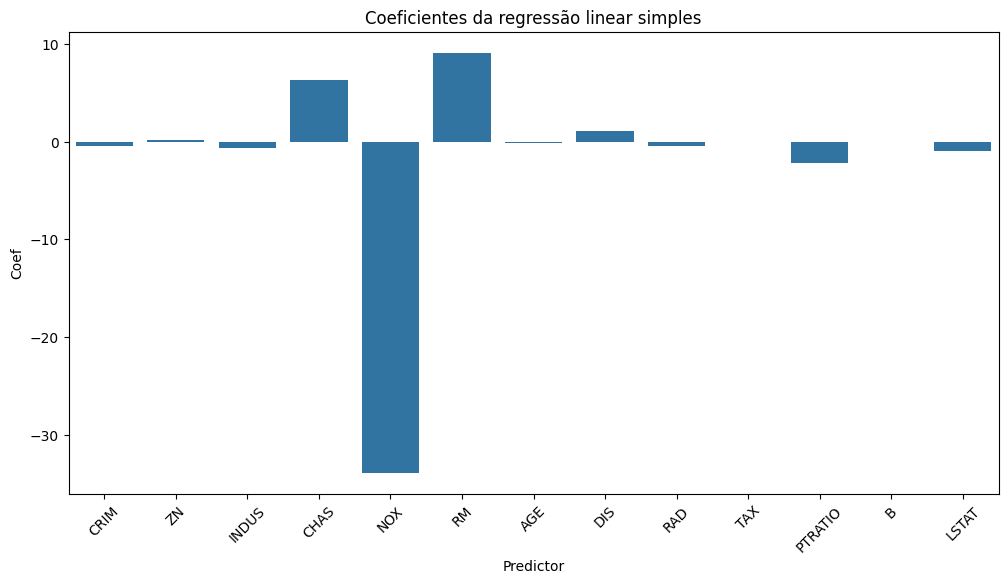

In [72]:
# Gráfico dos coeficientes
plt.figure(figsize=(12,6))
sns.barplot(x='Predictor', y='Coef', data=simple_results_df)
plt.xticks(rotation=45)
plt.title("Coeficientes da regressão linear simples")
plt.show()

In [75]:
# Preditores significativos
sig_simple = simple_results_df[simple_results_df['p-value'] < 0.05]
print("Preditores significativos (simples, p<0.05):")
print(sig_simple)

Preditores significativos (simples, p<0.05):
   Predictor       Coef       p-value
0       CRIM  -0.415190  1.173987e-19
1         ZN   0.142140  5.713584e-17
2      INDUS  -0.648490  4.900260e-31
3       CHAS   6.346157  7.390623e-05
4        NOX -33.916055  7.065042e-24
5         RM   9.102109  2.487229e-74
6        AGE  -0.123163  1.569982e-18
7        DIS   1.091613  1.206612e-08
8        RAD  -0.403095  5.465933e-19
9        TAX  -0.025568  5.637734e-29
10   PTRATIO  -2.157175  1.609509e-34
11         B   0.033593  1.318113e-14
12     LSTAT  -0.950049  5.081103e-88


**b. Ajuste um modelo de regressão múltipla para prever a resposta usando todos os preditores. Descreva seus resultados. Para quais preditores podemos rejeitar a hipótese nula 𝐻0:𝛽𝑗=0?**

Nem todos os preditores significativos na regressão simples permanencem significativos na múltipla. Isso ocorre devido à correlação entre preditores (multicolinearidade). Variáveis com **p > 0.05** não contribuem significativamente quando controlamos pelos outros preditores.

In [76]:
# Regressão múltipla
X_multi = sm.add_constant(X)
multi_model = sm.OLS(y, X_multi).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          6.72e-135
Time:                        21:56:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [78]:
# Preditores significativos
multi_significant = multi_model.pvalues[multi_model.pvalues < 0.05]
multi_significant = multi_significant.drop('const')
print(f"Preditores significativos na regressão múltipla (p < 0.05):")
print(multi_significant)

Preditores significativos na regressão múltipla (p < 0.05):
CRIM       1.086810e-03
ZN         7.781097e-04
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64


**c. Como seus resultados do item (a) se comparam aos do item (b)? Crie um gráfico mostrando:**
- **eixo X → coeficientes da regressão simples**
- **eixo Y → coeficientes da regressão múltipla.**
  
**Cada ponto representa um preditor.**

O gráfico mostra como a magnitude e sinal dos coeficientes mudam ao incluir outros preditores. Mudanças grandes indicam correlação entre preditores, enquanto pequenas indicam efeitos independentes.

In [79]:
# Criar DataFrame para comparação
comparison_df = simple_results_df.copy()
comparison_df['MultiCoef'] = multi_model.params[1:].values

print(comparison_df['MultiCoef'])

0     -0.108011
1      0.046420
2      0.020559
3      2.686734
4    -17.766611
5      3.809865
6      0.000692
7     -1.475567
8      0.306049
9     -0.012335
10    -0.952747
11     0.009312
12    -0.524758
Name: MultiCoef, dtype: float64


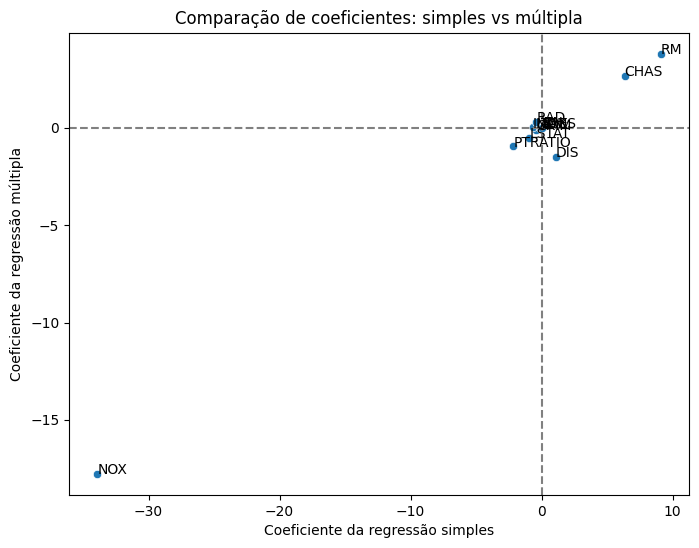

In [80]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Coef', y='MultiCoef', data=comparison_df)
for i in range(len(comparison_df)):
    plt.text(comparison_df['Coef'][i], comparison_df['MultiCoef'][i], comparison_df['Predictor'][i])
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Coeficiente da regressão simples")
plt.ylabel("Coeficiente da regressão múltipla")
plt.title("Comparação de coeficientes: simples vs múltipla")
plt.show()    

**d. Há evidência de associação não-linear entre algum preditor e a resposta? Para responder, ajuste para cada preditor um modelo da forma:**
$$
Y=β_0​+β_1​X+β_2​X^2+β_3​X^3+ϵ
$$

In [81]:
nonlinear_results = []

for col in X.columns:
    X_poly = pd.DataFrame({
        'const': 1,
        'X': X[col],
        'X2': X[col]**2,
        'X3': X[col]**3
    })
    model_poly = sm.OLS(y, X_poly).fit()
    nonlinear_results.append({
        'Predictor': col,
        'p_X2': model_poly.pvalues['X2'],
        'p_X3': model_poly.pvalues['X3']
    })

nonlinear_df = pd.DataFrame(nonlinear_results)
print(nonlinear_df)

# Preditores com evidência de não-linearidade (p < 0.05 em X2 ou X3)
nonlinear_significant = nonlinear_df[(nonlinear_df['p_X2'] < 0.05) | (nonlinear_df['p_X3'] < 0.05)]
print("Preditores com associação não-linear significativa:")
print(nonlinear_significant)

   Predictor          p_X2          p_X3
0       CRIM  5.184482e-04  2.541096e-02
1         ZN  1.941865e-05  7.981118e-05
2      INDUS  7.807276e-04  1.802575e-02
3       CHAS  7.390623e-05  7.390623e-05
4        NOX  5.522193e-02  4.100152e-02
5         RM  8.952478e-06  1.461903e-04
6        AGE  5.493772e-01  3.096903e-01
7        DIS  2.569178e-03  2.146307e-02
8        RAD  9.907537e-04  4.819196e-04
9        TAX  2.920043e-01  3.530609e-01
10   PTRATIO  7.001702e-02  5.900888e-02
11         B  5.323182e-01  6.408515e-01
12     LSTAT  9.177622e-12  7.428441e-07
Preditores com associação não-linear significativa:
   Predictor          p_X2          p_X3
0       CRIM  5.184482e-04  2.541096e-02
1         ZN  1.941865e-05  7.981118e-05
2      INDUS  7.807276e-04  1.802575e-02
3       CHAS  7.390623e-05  7.390623e-05
4        NOX  5.522193e-02  4.100152e-02
5         RM  8.952478e-06  1.461903e-04
7        DIS  2.569178e-03  2.146307e-02
8        RAD  9.907537e-04  4.819196e-04
12   

# Classificação

## (Exercício 7): Probabilidade de pagamento de dividendos

**Suponha que desejamos prever se uma determinada ação pagará dividendos este ano ("Sim" ou "Não") com base em $X$, o lucro percentual do ano anterior. Examinamos muitas empresas e descobrimos que a média de $X$ para empresas que pagaram dividendos foi $𝑋ˉ= 10$, enquanto a média para as que não pagaram foi $𝑋ˉ= 0$. Além disso, a variância de $X$ para os dois grupos é $σ^2=36$. Finalmente, 80% das empresas pagaram dividendos. Assumindo que $X$ segue uma distribuição normal em cada classe, prediga a probabilidade de que uma empresa pagará dividendos este ano dado que seu lucro percentual no ano passado foi $X=4$.** 

In [82]:
import numpy as np

# --- Parâmetros conhecidos ---
mu_yes = 10      # média das empresas que pagaram dividendos
mu_no = 0        # média das empresas que não pagaram
sigma = 6        # desvio padrão
p_yes = 0.8      # probabilidade a priori de pagar dividendo
p_no = 0.2       # probabilidade a priori de não pagar
x = 4            # lucro percentual do ano anterior

# --- Função densidade normal ---
def normal_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# --- Densidades condicionais ---
f_x_yes = normal_pdf(x, mu_yes, sigma)
f_x_no = normal_pdf(x, mu_no, sigma)

# --- Teorema de Bayes ---
numerator = p_yes * f_x_yes
denominator = numerator + p_no * f_x_no
posterior_yes = numerator / denominator

print(f"Probabilidade de pagar dividendo dado X=4: {posterior_yes:.4f} ({posterior_yes*100:.2f}%)")

Probabilidade de pagar dividendo dado X=4: 0.7519 (75.19%)


## (Exercício 14): Predição com o dataset *Auto*

Neste problema, você desenvolverá um modelo para prever se um determinado carro tem alta ou baixa eficiência de combustível (milhas por galão — mpg), com base no conjunto de dados Auto.

**a. Crie uma variável binária `mpg01`, que contém o valor 1 se o campo `mpg` (milhas por galão) estiver acima da mediana, e 0 se estiver abaixo da mediana. Você pode calcular a mediana usando o método `.median()` do DataFrame. Depois, adicione a coluna mpg01 ao DataFrame da seguinte forma:**
$$
Auto['mpg01'] = mpg01
$$

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np

# Carregar dataset (substituto equivalente ao Auto)
df = sns.load_dataset('mpg')
df = df.dropna().reset_index(drop=True)

# Criar variável binária mpg01
median_mpg = df['mpg'].median()
df['mpg01'] = (df['mpg'] > median_mpg).astype(int)

print("Mediana de mpg:", median_mpg)
print(df['mpg01'].value_counts())

Mediana de mpg: 22.75
mpg01
0    196
1    196
Name: count, dtype: int64


**b. Explore os dados graficamente para investigar a associação entre `mpg01` e as demais variáveis. Quais variáveis parecem ser mais úteis para prever `mpg01`? Gráficos de dispersão (scatterplots) e gráficos de caixa (boxplots) podem ser ferramentas úteis aqui. Descreva suas descobertas.**

Correlação com mpg01:
 cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
model_year      0.429904
acceleration    0.346822
dtype: float64
Variáveis selecionadas: ['cylinders', 'weight', 'displacement', 'horsepower']


<Figure size 600x400 with 0 Axes>

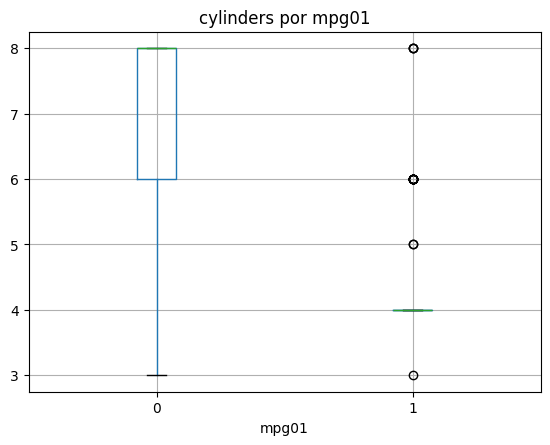

<Figure size 600x400 with 0 Axes>

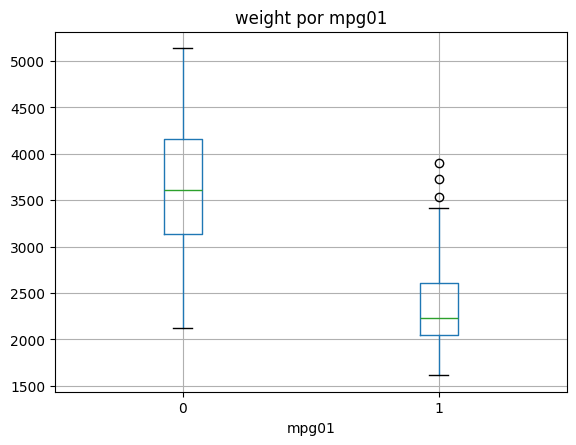

<Figure size 600x400 with 0 Axes>

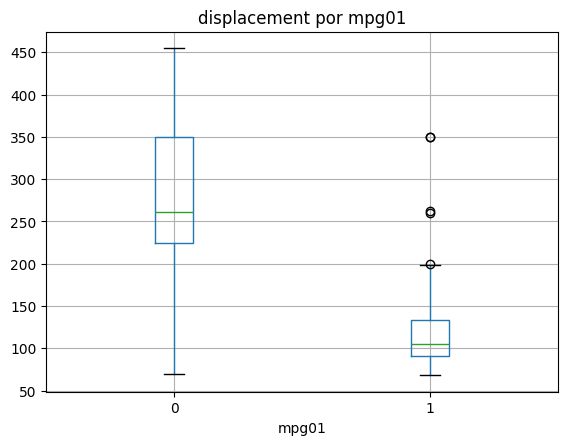

<Figure size 600x400 with 0 Axes>

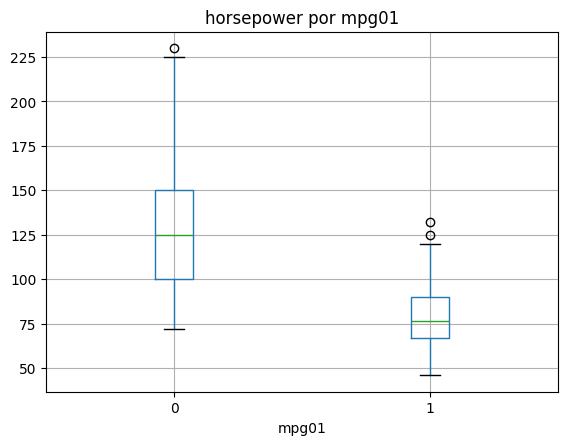

In [84]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('mpg')
numeric_cols.remove('mpg01')

# Correlação absoluta com mpg01
corrs = {col: abs(np.corrcoef(df[col], df['mpg01'])[0, 1]) for col in numeric_cols}
corrs_series = pd.Series(corrs).sort_values(ascending=False)
print("Correlação com mpg01:\n", corrs_series)

# Escolher variáveis mais associadas
top_predictors = corrs_series.index[:4].tolist()
print("Variáveis selecionadas:", top_predictors)

# Boxplots por mpg01
for col in top_predictors:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by='mpg01')
    plt.title(f'{col} por mpg01')
    plt.suptitle('')
    plt.show()

**c. Divida os dados em um conjunto de treinamento e um conjunto de teste.**

In [85]:
from sklearn.model_selection import train_test_split

X = df[top_predictors]
y = df['mpg01']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)

Treino: (274, 4) Teste: (118, 4)


In [86]:
X_train

,cylinders,weight,displacement,horsepower
6,8,4354,454.0,220.0
169,4,2702,134.0,96.0
158,6,3907,231.0,110.0
220,8,4060,260.0,110.0
2,8,3436,318.0,150.0
...,...,...,...,...
175,4,2694,115.0,95.0
200,6,3193,258.0,95.0
49,4,2123,116.0,90.0
105,8,4499,350.0,180.0


In [87]:
X_test

,cylinders,weight,displacement,horsepower
306,4,2556,151.0,90.0
303,4,2670,151.0,90.0
335,4,2635,151.0,84.0
262,8,3205,302.0,139.0
330,6,2910,168.0,132.0
...,...,...,...,...
89,8,4952,429.0,198.0
170,4,2223,90.0,71.0
380,6,2945,181.0,110.0
294,4,2670,121.0,80.0


**d. Realize uma Análise Discriminante Linear (LDA) no conjunto de treinamento para prever `mpg01` usando as variáveis que pareceram mais associadas a `mpg01` no item (b). Qual é o erro de teste obtido pelo modelo?**

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

acc_lda = accuracy_score(y_test, y_pred_lda)
print("Acurácia LDA:", acc_lda)
print(classification_report(y_test, y_pred_lda))

Acurácia LDA: 0.8898305084745762
              precision    recall  f1-score   support

           0       0.93      0.85      0.88        59
           1       0.86      0.93      0.89        59

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.89      0.89      0.89       118



**e. Realize uma Análise Discriminante Quadrática (QDA) no conjunto de treinamento para prever `mpg01` usando as mesmas variáveis do item (b).
Qual é o erro de teste obtido?**

In [89]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

acc_qda = accuracy_score(y_test, y_pred_qda)
print("Acurácia QDA:", acc_qda)

Acurácia QDA: 0.8983050847457628


**f. Realize uma Regressão Logística no conjunto de treinamento para prever `mpg01` usando as variáveis mais associadas com `mpg01`.
Qual é o erro de teste obtido?**

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Acurácia Logística:", acc_log)

Acurácia Logística: 0.8305084745762712


**g. Realize um modelo de Naive Bayes no conjunto de treinamento para prever mpg01 usando as mesmas variáveis. Qual é o erro de teste obtido?**

In [91]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("Acurácia Naive Bayes:", acc_nb)

Acurácia Naive Bayes: 0.8983050847457628


**h. Realize um K-Nearest Neighbors (KNN) no conjunto de treinamento, testando vários valores de K, para prever mpg01 (usando as mesmas variáveis do item b). Quais erros de teste são obtidos? Qual valor de K parece ter o melhor desempenho?**

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

for k in [1, 3, 5, 7, 9, 11, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_pred_knn = knn.predict(X_test_s)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    print(f"K={k} -> Acurácia: {acc_knn:.4f} | Erro: {1-acc_knn:.4f}")

K=1 -> Acurácia: 0.8898 | Erro: 0.1102
K=3 -> Acurácia: 0.9153 | Erro: 0.0847
K=5 -> Acurácia: 0.9322 | Erro: 0.0678
K=7 -> Acurácia: 0.9237 | Erro: 0.0763
K=9 -> Acurácia: 0.9068 | Erro: 0.0932
K=11 -> Acurácia: 0.8983 | Erro: 0.1017
K=15 -> Acurácia: 0.8983 | Erro: 0.1017
